In [5]:
!pip install rfpimp
import rfpimp
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split



Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


##Importing Dataset and Splitting

In [6]:
data = pd.read_csv('drag_coef.csv')
features = ['phi','Re','Cd,meas']
data_train, data_test = train_test_split(data, test_size=0.30)
data_train = data_train[features]
data_test = data_test[features]

X_train, y_train = data_train.drop('Cd,meas',axis=1), data_train['Cd,meas']
X_test, y_test = data_test.drop('Cd,meas',axis=1), data_test['Cd,meas']

##Training Using Random Forest Regressor

In [7]:
randomforest = RandomForestRegressor(n_estimators=200, n_jobs=-1)
randomforest.fit(X_train, y_train)

imp = rfpimp.importances(randomforest, X_test, y_test)

##Histogram Plotting of Feature Importance

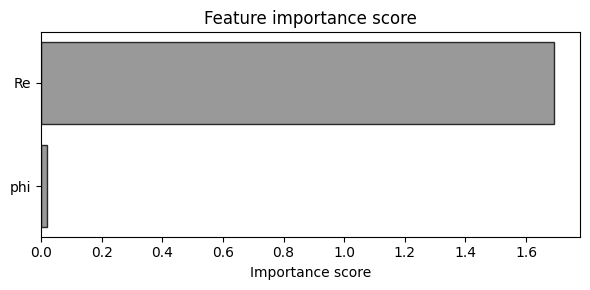

In [8]:
fig, ax = plt.subplots(figsize=(6, 3))
ax.barh(imp.index, imp['Importance'], height=0.8, facecolor='grey', alpha=0.8, edgecolor='k')
ax.set_xlabel('Importance score')
ax.set_title('Feature importance score')
ax.set_yticks(imp.index)
ax.set_yticklabels(imp.index)
plt.gca().invert_yaxis()

fig.tight_layout()